In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [3]:
# Replace the 'data' and 'volume' column names with the actual column names in your dataset
df = pd.read_csv('GOOG.csv', parse_dates=['date'], index_col='date')


In [4]:
scaler = MinMaxScaler()
df['volume'] = scaler.fit_transform(df['volume'].values.reshape(-1, 1))


In [5]:
train_data = df.iloc[:1000]  # Adjust the number of training samples as per your dataset size
test_data = df.iloc[1000:]  # Adjust the number of testing samples as per your dataset size


In [6]:
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10  # Adjust the window size as per your preference
X_train, y_train = prepare_data(train_data['volume'].values, window_size)
X_test, y_test = prepare_data(test_data['volume'].values, window_size)


In [7]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)  # Adjust the number of epochs and batch size as per your preference


Epoch 1/50
31/31 [==============================] - 4s 8ms/step - loss: 0.0360
Epoch 2/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 3/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 5/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0113
Epoch 6/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0112
Epoch 7/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 8/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 9/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 10/50
31/31 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 11/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 12/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 13/50
31/31 [==============================

In [8]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


8/8 [==============================] - 0s 4ms/step


In [9]:

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


In [10]:
len(test_predictions)

248

In [11]:
len(train_predictions)

990

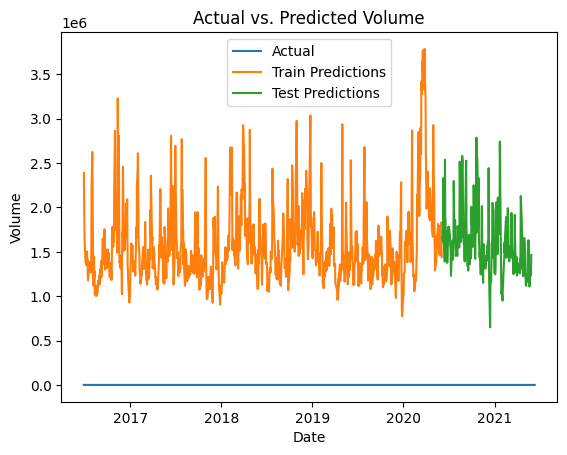

In [19]:
import matplotlib.pyplot as plt

# Prepare the indices for plotting
train_indices = df.index[window_size:window_size+len(train_predictions)]
test_indices = df.index[window_size+len(train_predictions)+1:]

# Plot the actual values
plt.plot(df.index[window_size:], df['volume'][window_size:], label='Actual')

# Plot the predicted values for the training set
plt.plot(train_indices, train_predictions, label='Train Predictions')

# Plot the predicted values for the testing set
plt.plot(test_indices[:len(test_predictions)], test_predictions, label='Test Predictions')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Actual vs. Predicted Volume')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the accuracy metrics
train_actual = df['volume'][window_size:window_size+len(train_predictions)]
test_actual = df['volume'][window_size+len(train_predictions)+10:]

In [30]:
len(train_actual)

990

In [33]:
len(test_actual)

248

In [34]:


train_mae = mean_absolute_error(train_actual, train_predictions)
train_mse = mean_squared_error(train_actual, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(train_actual, train_predictions)

test_mae = mean_absolute_error(test_actual, test_predictions)
test_mse = mean_squared_error(test_actual, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(test_actual, test_predictions)

print("Train MAE:", train_mae)
print("Train RMSE:", train_rmse)
print("Train R-squared:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)


Train MAE: 1574157.7352759466
Train RMSE: 1634764.5158168902
Train R-squared: -179816354049904.6

Test MAE: 1601102.0190421953
Test RMSE: 1637458.7735975685
Test R-squared: -255150488146164.47
